# Proyecto de curso: Clasificador de medusas

## Entendimineto del negocio

## Entendimiento de los datos
El siguiente conjunto de datos fue extraido del repositorio https://www.kaggle.com/datasets/anshtanwar/jellyfish-types/data, el cual cuenta con 900 imagenes sobre distintas especies de medusas. El objetivo del proyecto es aplicar las tecnicas de Machine Learning durante el curso y poder crear un clasificador de medusas a partir de las imagenes brindadas.

Son 900 imagenes que se encuentran divididas en 6 categorias, cada una con 150 imagenes organizadas en carpetas con el respectivo nombre de la clase a la cual pertenecen cada medusa.

La clases a la las que pertenecen las medusas del conjunto de datos son las siguientes:
1. Barrel jellyfish (Rhizostoma pulmo): La medusa más grande que se encuentra en aguas británicas, con una campana que puede crecer hasta 90 cm de diámetro. Se alimenta de plancton y peces pequeños atrapándolos con sus tentáculos.
2. Blue jellyfish (Cyanea lamarckii): Medusas de gran tamaño que pueden crecer hasta 30 cm de diámetro. Se alimenta de plancton y peces pequeños atrapándolos con sus tentáculos.
3. Compass jellyfish (Chrysaora hysoscella): El nombre se debe a las marcas marrones en su campana que se asemejan a una rosa de los vientos. Se alimenta de plancton y peces pequeños atrapándolos con sus tentáculos.
4. Lion’s mane jellyfish (Cyanea capillata): La medusa más grande del mundo, con una campana que puede crecer hasta 2 metros de diámetro y tentáculos que pueden alcanzar hasta 30 metros de largo. Se alimenta de plancton y peces pequeños atrapándolos con sus tentáculos.
5. Mauve stinger (Pelagia noctiluca): Pequeña medusa con largos tentáculos y estructuras verrugosas en su campana repletas de células urticantes. Se alimenta de otras pequeñas medusas y ascidias oceánicas.
6. Moon jellyfish (Aurelia aurita): Medusa común con cuatro gónadas en forma de herradura visibles a través de la parte superior de su campana translúcida. Se alimenta recolectando medusas, plancton y moluscos con sus tentáculos.

In [1]:
import cv2
import numpy as np
import os
from tqdm import tqdm
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
class_name = ['barrel_jellyfish', 'blue_jellyfish', 'compass_jellyfish', 'lions_mane_jellyfish', 'mauve_stinger_jellyfish', 'Moon_jellyfish']
class_names_label = {class_name: i for i, class_name in enumerate(class_name)}
count_class = len(class_name)
IMAGE_SIZE = (240, 240)
SEED = 17

La fotografias de las medusas son de distintos tamaños, por eso, al ser leidas se normalizan para que todas tengan un tamaño de 240px x 240px que es tamaño maximo de las fotos mas grandes. El atributo de la clase a la cual pertenece es de una vez capturado cuando se listan los archivos para cada carpeta

In [3]:
def load_data(class_name):
    
    data = None
    
    images = []
    labels = []

    #Carpetas que contienen las fotos
    for folder in class_name:

        print(f'Cargando "{folder}"')
        #Captura la clase y la transforma a volor numerico cuando se leen las fotos de una carpeta
        label = class_names_label[folder]

        #Lee las carpetas en una foto
        for file in tqdm(os.listdir(folder)):

            #Une el nombre de la carpeta con el nombre del archivo
            img_path = os.path.join(folder, file)
            #Lee la foto
            image = cv2.imread(img_path)
            #Cambia el formato de la foto de BGR a RGB
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            #Cambia el tamaño de la foto
            image = cv2.resize(image, IMAGE_SIZE)
            #Agrega la foto cargada y procesada a la lista
            images.append(image.reshape(1,-1))
            #Agrega el numero de la clase a la cual pertenece
            labels.append(label)
    
    #Agrupa todas las fotos en un arreglo
    images = np.array(images, dtype = 'uint8')
    #Agrupa todas las clases en un grupo
    labels = np.array(labels, dtype = 'int32')

    return (images.reshape(900,-1), labels)

In [4]:
X, y= load_data(class_name)

Cargando "barrel_jellyfish"


100%|███████████████████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 203.65it/s]


Cargando "blue_jellyfish"


100%|███████████████████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 192.93it/s]


Cargando "compass_jellyfish"


100%|███████████████████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 215.73it/s]


Cargando "lions_mane_jellyfish"


100%|███████████████████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 212.01it/s]


Cargando "mauve_stinger_jellyfish"


100%|███████████████████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 220.17it/s]


Cargando "Moon_jellyfish"


100%|███████████████████████████████████████████████████████████████████████████████| 150/150 [00:00<00:00, 215.65it/s]


Text(0, 0.5, 'Cantidad')

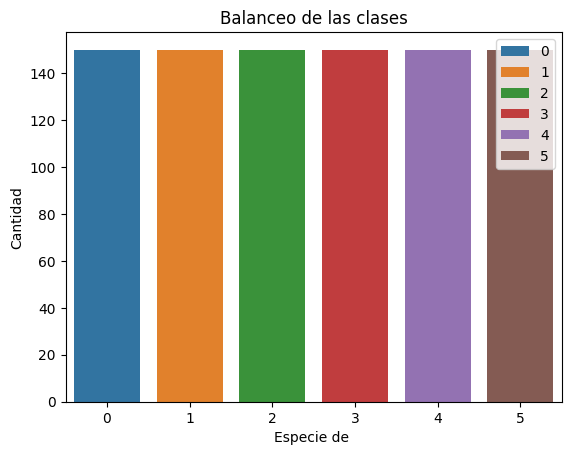

In [5]:
plt.figure()
sns.countplot(x = y, 
              hue=y,
              palette=sns.color_palette(n_colors=6))
plt.title('Balanceo de las clases')
plt.xlabel('Especie de ')
plt.ylabel('Cantidad')


Una fotografia al ser leida y transformada a formato RGB se vuelve una matriz de 3 dimensiones para cada pixel, en donde sub indice indica la intensidad del Rojo(R), Verde(G) y Azul(B) que componen el pixel

In [6]:
def display_random_image(class_names, X, y):
    index = np.random.randint(X.shape[0])
    plt.figure()
    plt.imshow(X[index].reshape(240,240,3))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(f'Image #{index} : '+class_names[y[index]])
    plt.show()

In [7]:
def display_image(index, X, y):
    plt.figure()
    plt.imshow(X[index].reshape(240,240,3))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title(f'Image #{index} : '+class_names[y[index]])
    plt.show()

In [8]:
def display_multiple_imges(X,y):
    fig = plt.figure(figsize=(7,12))
    for i in range(X.shape[0]):
        ax=fig.add_subplot(6,5,i+1)
        plt.imshow(X[i].reshape(240,240,3))
        ax.set_title(class_name[y[i]], fontsize = 8)
        plt.xticks([])
        plt.yticks([])

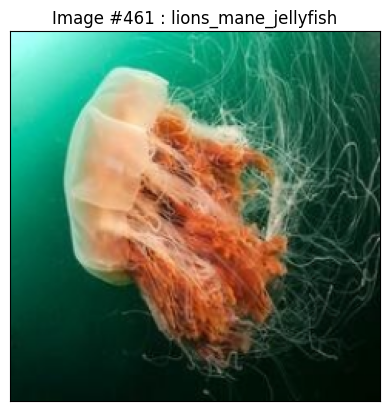

In [9]:
display_random_image(class_name, X, y)

## Preparación de los datos


In [10]:
# Gráfica de la varianza explicada acumulada.

def cumulative_explained_variance_plot(expl_variance):

  cum_var_exp = np.cumsum(expl_variance)

  plt.figure(dpi = 100, figsize = (8, 6))
  plt.title('Curva acumulativa de la varianza explicada VS n° de componentes principales',
            fontdict= dict(family ='serif', size = 16))
  plt.xlabel('Número de componentes principales',
             fontdict= dict(family ='serif', size = 14))
  plt.ylabel('Varianza explicada acumulativa',
             fontdict= dict(family ='serif', size = 14))

  nc = np.arange(1, expl_variance.shape[0] + 1)

  plt.plot(nc, cum_var_exp, '--r')
  plt.plot(nc, cum_var_exp, 'c*', ms = 5)
  plt.show()

In [11]:
from sklearn.model_selection import train_test_split
_, X_reduce, _, y_reduce = train_test_split(X,
                                            y,
                                            test_size=30,
                                            random_state=SEED,
                                            stratify=y
                                            )
_, reduce_counts = np.unique(y_reduce, return_counts=True)

In [30]:
temp = X_reduce.reshape(30,240,240,3)
temp[:,:,:,0].shape

(30, 240, 240)

<Axes: >

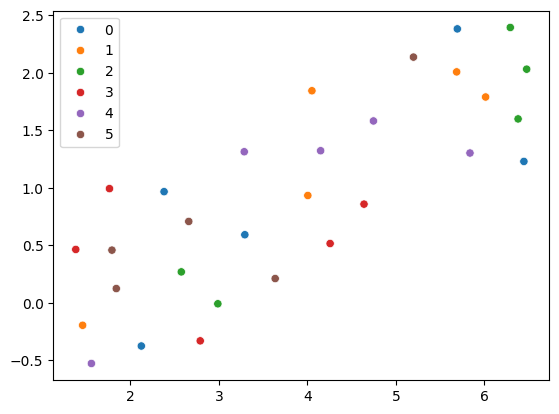

In [19]:
from umap import UMAP

umap = UMAP()
umap_transform = umap.fit_transform(X_reduce)
sns.scatterplot(x=umap_transform[:, 0],
                y=umap_transform[:, 1],
                hue=y_reduce,
                palette=sns.color_palette(n_colors=6))

<Axes: >

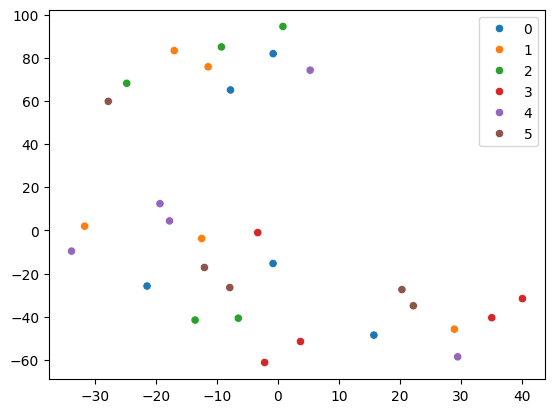

In [22]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=SEED,
            perplexity=5
           )
tsne_transform = tsne.fit_transform(X_reduce)
sns.scatterplot(x=tsne_transform[:, 0],
                y=tsne_transform[:, 1],
                hue=y_reduce,
                palette=sns.color_palette(n_colors=6))

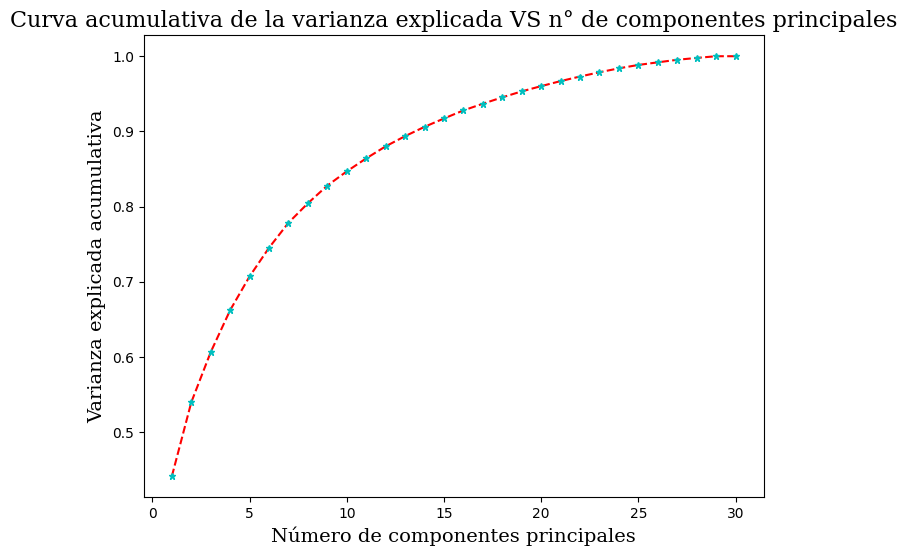

In [20]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None,
          random_state=SEED)
pca_transform = pca.fit_transform(X_reduce)
varianza_expl = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(varianza_expl)
cumulative_explained_variance_plot(varianza_expl)

In [19]:
pca_transform.shape

(30, 30)

In [33]:
for i in range(5,31,5):
    #print(cum_var_exp[i-1])
    pca = PCA(random_state=SEED,
             n_components=i)
    pca_transform = pca.fit_transform(X_reduce)
    pca_inverse = pca.inverse_transform(pca_transform)
    print(pca_inverse[0][0])
    #plt.imshow(pca_inverse[0].reshape(240,240,3))
    #display_multiple_imges(pca_inverse, y_reduce)

46.92685286670381
-3.838196292854718
5.002287652547494
6.323933170157595
3.5193570628659856
5.000000000002011


In [22]:
from sklearn.random_projection import SparseRandomProjection

srp = SparseRandomProjection(random_state=SEED)
srp_transform = srp.fit_transform(X)
srp_transform.shape

(900, 5830)

### Division del conjunto de datos en entrenamiento, validación y prueba
Para la creación de los subconjuntos de se usara una proporción de 70% para el conjunto de entrenamiento 10% para el conjunto de validación y un 20% para el conjunto de pruebas

<Axes: >

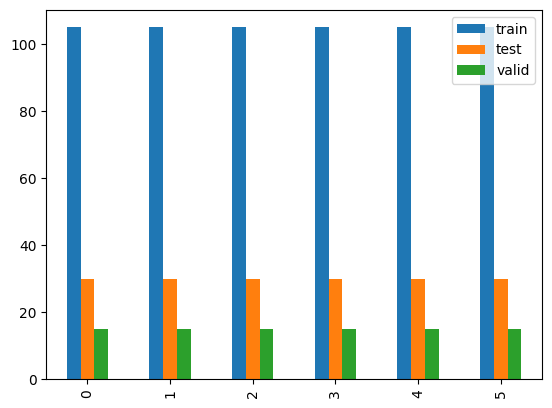

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=180,
                                                    random_state=SEED,
                                                    stratify=y
                                                   )
X_train, X_valid, y_train, y_valid = train_test_split(X_train,
                                                      y_train,
                                                      test_size=90,
                                                      random_state=SEED,
                                                      stratify=y_train
                                                      )
_, train_counts = np.unique(y_train, return_counts=True)
_, test_counts = np.unique(y_test, return_counts=True)
_, valid_counts = np.unique(y_valid, return_counts=True)
pd.DataFrame({'train': train_counts,
              'test': test_counts,
              'valid': valid_counts
             }).plot.bar()
#print(train_counts, test_counts, valid_counts)

## Modelamiento